In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_data= pd.read_csv('train_data.csv')
train_data.head()

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,...,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,...,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,...,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,...,0.022066,57.993905,0.003298,0.164309,0.002918,0.386400,89.0,83.0,40.0,14.0
4,0,0.257806,5,-10.391260,-7.852942,9.036838,14510.0,13792.0,478.7,5811.1,...,0.015075,57.946717,0.003670,0.164172,0.003220,0.386388,89.0,83.0,40.0,14.0


In [3]:
train_data.isna().sum()

event_id                0
time_to_tca             0
mission_id              0
risk                    0
max_risk_estimate       0
                     ... 
c_sigma_ndot         9241
F10                  6822
F3M                  6822
SSN                  6822
AP                   6822
Length: 103, dtype: int64

In [4]:
train_data

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,...,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,...,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,...,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,...,0.022066,57.993905,0.003298,0.164309,0.002918,0.386400,89.0,83.0,40.0,14.0
4,0,0.257806,5,-10.391260,-7.852942,9.036838,14510.0,13792.0,478.7,5811.1,...,0.015075,57.946717,0.003670,0.164172,0.003220,0.386388,89.0,83.0,40.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162629,13153,3.029751,1,-7.108630,-5.142668,7.561579,2307.0,14976.0,-472.1,-159.9,...,0.071060,48.480202,0.011479,0.145746,0.002764,0.231577,81.0,84.0,48.0,18.0
162630,13153,2.799253,1,-7.070070,-5.137869,7.471857,2254.0,14976.0,-469.7,-163.3,...,0.063959,48.565132,0.009935,0.145729,0.002678,0.231583,78.0,84.0,49.0,19.0
162631,13153,2.385399,1,-7.066209,-5.137034,7.463470,2259.0,14976.0,-469.3,-158.8,...,0.059657,48.547317,0.009491,0.145745,0.002632,0.231582,78.0,84.0,49.0,19.0
162632,13153,2.043339,1,-7.028307,-5.131297,7.378397,2257.0,14976.0,-465.2,-160.3,...,0.039351,48.540602,0.002612,0.145734,0.002631,0.231583,78.0,84.0,49.0,19.0


In [5]:
train_data = train_data.interpolate()
train_data.isnull().sum()

event_id             0
time_to_tca          0
mission_id           0
risk                 0
max_risk_estimate    0
                    ..
c_sigma_ndot         0
F10                  0
F3M                  0
SSN                  0
AP                   0
Length: 103, dtype: int64

In [6]:
train_data

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,...,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,...,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,...,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,...,0.022066,57.993905,0.003298,0.164309,0.002918,0.386400,89.0,83.0,40.0,14.0
4,0,0.257806,5,-10.391260,-7.852942,9.036838,14510.0,13792.0,478.7,5811.1,...,0.015075,57.946717,0.003670,0.164172,0.003220,0.386388,89.0,83.0,40.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162629,13153,3.029751,1,-7.108630,-5.142668,7.561579,2307.0,14976.0,-472.1,-159.9,...,0.071060,48.480202,0.011479,0.145746,0.002764,0.231577,81.0,84.0,48.0,18.0
162630,13153,2.799253,1,-7.070070,-5.137869,7.471857,2254.0,14976.0,-469.7,-163.3,...,0.063959,48.565132,0.009935,0.145729,0.002678,0.231583,78.0,84.0,49.0,19.0
162631,13153,2.385399,1,-7.066209,-5.137034,7.463470,2259.0,14976.0,-469.3,-158.8,...,0.059657,48.547317,0.009491,0.145745,0.002632,0.231582,78.0,84.0,49.0,19.0
162632,13153,2.043339,1,-7.028307,-5.131297,7.378397,2257.0,14976.0,-465.2,-160.3,...,0.039351,48.540602,0.002612,0.145734,0.002631,0.231583,78.0,84.0,49.0,19.0


In [7]:
#the feature are devided in 3 groups so we can display the correlation with risk
df_copy = train_data[['event_id','time_to_tca','risk','max_risk_estimate', 'max_risk_scaling', 'miss_distance',
                      'relative_speed', 'relative_position_r', 'relative_position_t','relative_position_n', 
                      'relative_velocity_r', 'relative_velocity_t','relative_velocity_n',
                      't_time_lastob_start', 't_time_lastob_end', 't_recommended_od_span','t_actual_od_span',
                      't_obs_available','t_obs_used', 't_residuals_accepted', 't_weighted_rms','t_rcs_estimate',
                      't_cd_area_over_mass', 't_cr_area_over_mass','t_sedr', 't_j2k_sma', 't_j2k_ecc', 't_j2k_inc']]
df_copy

,event_id,time_to_tca,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,...,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc
0,0,1.566798,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,-13666.8,...,458,98.9,1.265,0.4020,0.013826,0.007173,0.000051,6996.918867,0.003997,97.806412
1,0,1.207494,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,-13319.8,...,455,98.5,1.270,0.4020,0.013487,0.009139,0.000060,6996.920255,0.003996,97.806420
2,0,0.952193,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,-13256.1,...,455,98.5,1.257,0.4020,0.013357,0.007057,0.000060,6996.920553,0.003996,97.806418
3,0,0.579669,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,-13350.7,...,442,98.4,1.254,0.4020,0.013490,0.005480,0.000065,6996.920276,0.003997,97.806423
4,0,0.257806,-10.391260,-7.852942,9.036838,14510.0,13792.0,478.7,5811.1,-13288.0,...,439,98.8,1.340,0.4020,0.013906,0.007339,0.000068,6996.920446,0.003996,97.806426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162629,13153,3.029751,-7.108630,-5.142668,7.561579,2307.0,14976.0,-472.1,-159.9,-2253.1,...,479,99.2,1.169,4.8957,0.015281,0.022419,0.000021,7067.383415,0.002064,98.103051
162630,13153,2.799253,-7.070070,-5.137869,7.471857,2254.0,14976.0,-469.7,-163.3,-2199.4,...,482,99.4,1.187,4.8957,0.012927,0.011325,0.000017,7067.382735,0.002064,98.103042
162631,13153,2.385399,-7.066209,-5.137034,7.463470,2259.0,14976.0,-469.3,-158.8,-2204.7,...,479,99.4,1.175,4.8957,0.011416,0.012109,0.000015,7067.383054,0.002064,98.103046
162632,13153,2.043339,-7.028307,-5.131297,7.378397,2257.0,14976.0,-465.2,-160.3,-2203.0,...,476,99.5,1.170,4.8957,0.009455,0.000052,0.000013,7067.383240,0.002063,98.103041


<AxesSubplot:>

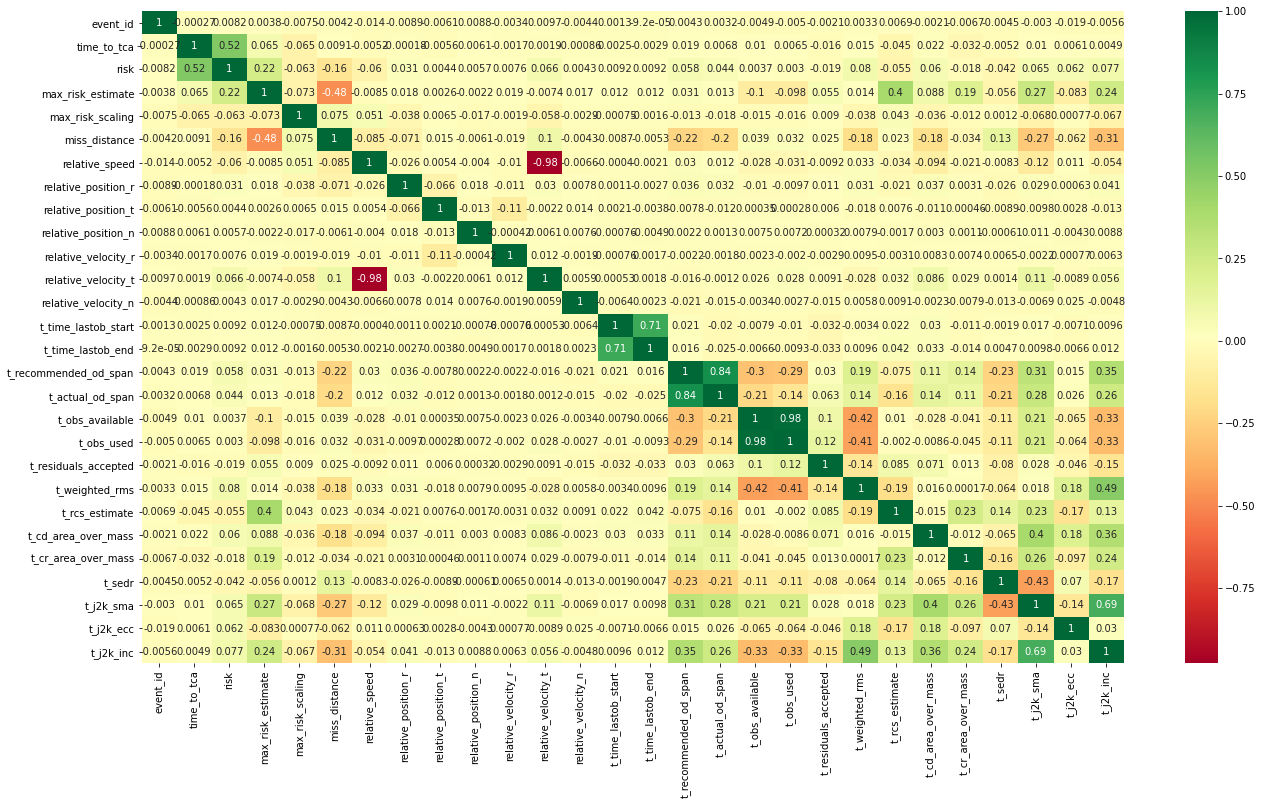

In [8]:
plt.figure(figsize=(22,12))
sns.heatmap(df_copy.corr(), annot =True, cmap='RdYlGn')

In [9]:
df_copy1 = train_data[['t_ct_r', 't_cn_r', 't_cn_t', 't_crdot_r', 't_crdot_t', 't_crdot_n', 't_ctdot_r','t_ctdot_t',
                      't_ctdot_n', 't_ctdot_rdot', 't_cndot_r','t_cndot_t', 't_cndot_n', 't_cndot_rdot',
                      't_cndot_tdot', 'c_time_lastob_start', 'c_time_lastob_end','c_recommended_od_span',
                      'c_actual_od_span','c_obs_available', 'c_obs_used', 'c_residuals_accepted','c_weighted_rms',
                      'c_cd_area_over_mass','c_cr_area_over_mass', 'c_sedr', 'c_j2k_sma', 'c_j2k_ecc', 'c_j2k_inc',
                      'c_ct_r', 'c_cn_r', 'c_cn_t','c_crdot_r', 'c_crdot_t', 'c_crdot_n', 'c_ctdot_r', 'c_ctdot_t',
                      'risk']]
df_copy1

,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,...,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,risk
0,-0.397969,0.292258,0.040799,0.394221,-0.999674,-0.038498,-0.981098,0.214612,-0.316493,-0.210247,...,74.045735,-0.824859,0.473976,-0.002576,0.825216,-0.999998,0.003565,-0.732954,0.220006,-10.204955
1,-0.073137,0.297366,0.060541,0.069652,-0.998192,-0.052511,-0.994240,-0.029644,-0.302333,0.034030,...,74.045736,-0.818207,0.482754,-0.003578,0.818573,-0.999998,0.004574,-0.728759,0.202595,-10.355758
2,-0.109230,0.305189,0.043711,0.107079,-0.996235,-0.034287,-0.996674,0.033933,-0.308501,-0.030161,...,74.045737,-0.817408,0.483828,-0.003742,0.817774,-0.999998,0.004738,-0.729083,0.201698,-10.345631
3,0.021588,0.423647,0.157544,-0.032072,-0.990913,-0.149998,-0.998856,-0.059398,-0.427166,0.072214,...,74.045736,-0.817557,0.483678,-0.003760,0.817923,-0.999998,0.004755,-0.728092,0.200534,-10.337809
4,0.417865,0.406002,0.246911,-0.465256,-0.983144,-0.243006,-0.999749,-0.430895,-0.405723,0.479990,...,74.045736,-0.815980,0.485794,-0.004081,0.816347,-0.999998,0.005077,-0.727257,0.196662,-10.391260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162629,0.609054,-0.034608,-0.063409,-0.495263,-0.990310,0.055494,-0.999986,-0.612665,0.034441,0.499247,...,86.483781,-0.538440,-0.717118,-0.031436,0.537872,-0.999999,0.031831,-0.664416,-0.272000,-7.108630
162630,0.591057,0.123080,0.053630,-0.478028,-0.990605,-0.049440,-0.999984,-0.595015,-0.123415,0.482377,...,86.483780,-0.540083,-0.716144,-0.031476,0.539516,-0.999999,0.031870,-0.663148,-0.271754,-7.070070
162631,0.677376,0.055617,0.025961,-0.579211,-0.991510,-0.032178,-0.999986,-0.680635,-0.056051,0.582867,...,86.483780,-0.539379,-0.716553,-0.031477,0.538812,-0.999999,0.031871,-0.663521,-0.272079,-7.066209
162632,0.187454,0.251362,0.049235,-0.144822,-0.998222,-0.049582,-0.999870,-0.200730,-0.252490,0.158366,...,86.483780,-0.539317,-0.716592,-0.031474,0.538750,-0.999999,0.031868,-0.663776,-0.271822,-7.028307


<AxesSubplot:>

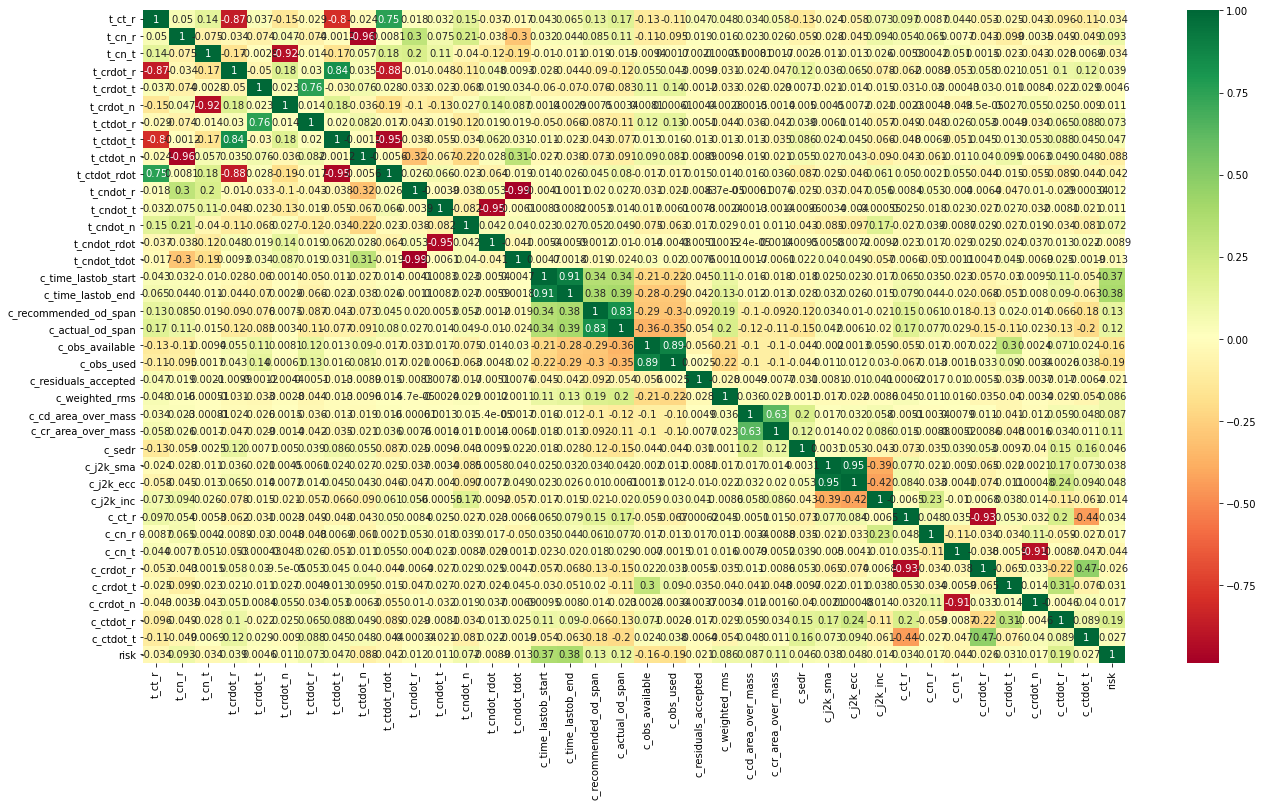

In [10]:
plt.figure(figsize=(22,12))
sns.heatmap(df_copy1.corr(), annot =True, cmap='RdYlGn')

In [11]:
df_copy2 = train_data[['c_ctdot_n','c_ctdot_rdot', 'c_cndot_r','c_cndot_t', 'c_cndot_n','c_ctdot_rdot', 'c_cndot_r',
                      'c_cndot_t', 'c_cndot_n','c_cndot_rdot', 'c_cndot_tdot', 't_span', 'c_span', 't_h_apo',
                      't_h_per', 'c_h_apo', 'c_h_per', 'geocentric_latitude', 'azimuth', 'mahalanobis_distance',
                      't_sigma_r', 'c_sigma_r', 't_sigma_t', 'c_sigma_t', 't_sigma_n','c_sigma_n', 't_sigma_rdot',
                      'c_sigma_rdot', 't_sigma_tdot', 'c_sigma_tdot', 't_sigma_ndot',
                      'c_sigma_ndot', 'F10', 'F3M', 'SSN', 'AP', 'risk']]
df_copy2

,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,...,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP,risk
0,-0.814249,-0.220621,0.249855,0.196620,0.722186,-0.220621,0.249855,0.196620,0.722186,-0.196908,...,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0,-10.204955
1,-0.817490,-0.203216,0.258964,0.195718,0.721903,-0.203216,0.258964,0.195718,0.721903,-0.196008,...,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0,-10.355758
2,-0.817662,-0.202320,0.260092,0.195558,0.721854,-0.202320,0.260092,0.195558,0.721854,-0.195849,...,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0,-10.345631
3,-0.817883,-0.201155,0.259681,0.195808,0.721874,-0.201155,0.259681,0.195808,0.721874,-0.196097,...,57.993905,0.003298,0.164309,0.002918,0.386400,89.0,83.0,40.0,14.0,-10.337809
4,-0.818575,-0.197284,0.261753,0.195657,0.721794,-0.197284,0.261753,0.195657,0.721794,-0.195947,...,57.946717,0.003670,0.164172,0.003220,0.386388,89.0,83.0,40.0,14.0,-10.391260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162629,0.846199,0.272650,0.642434,0.060384,-0.965621,0.272650,0.642434,0.060384,-0.965621,-0.060522,...,48.480202,0.011479,0.145746,0.002764,0.231577,81.0,84.0,48.0,18.0,-7.108630
162630,0.846275,0.272403,0.641449,0.060495,-0.965611,0.272403,0.641449,0.060495,-0.965611,-0.060633,...,48.565132,0.009935,0.145729,0.002678,0.231583,78.0,84.0,49.0,19.0,-7.070070
162631,0.846203,0.272728,0.641860,0.060470,-0.965613,0.272728,0.641860,0.060470,-0.965613,-0.060608,...,48.547317,0.009491,0.145745,0.002632,0.231582,78.0,84.0,49.0,19.0,-7.066209
162632,0.846259,0.272471,0.641902,0.060459,-0.965613,0.272471,0.641902,0.060459,-0.965613,-0.060597,...,48.540602,0.002612,0.145734,0.002631,0.231583,78.0,84.0,49.0,19.0,-7.028307


In [30]:
# it choose the features have correlation with risk higher than 0.01
correlations = train_data.corr()['risk'].sort_values(ascending=False)

significant_features = correlations[correlations > 0.01]
significant_features

risk                         1.000000
time_to_tca                  0.518096
c_time_lastob_end            0.379299
c_time_lastob_start          0.368001
max_risk_estimate            0.223786
c_ctdot_r                    0.191481
c_recommended_od_span        0.129550
c_actual_od_span             0.116252
c_cr_area_over_mass          0.105139
t_cn_r                       0.092741
c_cd_area_over_mass          0.086824
c_weighted_rms               0.086071
c_cndot_n                    0.080378
t_weighted_rms               0.080213
t_j2k_inc                    0.077279
t_ctdot_r                    0.072933
t_cndot_n                    0.072236
t_h_apo                      0.071844
c_sigma_t                    0.069317
c_sigma_r                    0.066305
c_sigma_n                    0.066269
c_position_covariance_det    0.066263
relative_velocity_t          0.065653
t_j2k_sma                    0.064876
t_j2k_ecc                    0.061977
t_sigma_t                    0.061099
t_sigma_r   

In [31]:
#to display the features that  have correlation with risk higher than 0.1 in list so it would be easier to copy
significant_features_list = significant_features.index.tolist()

# Add single quotes to each feature name
significant_features_list = [f'{feature}'for feature in significant_features_list]

print(significant_features_list)

['risk', 'time_to_tca', 'c_time_lastob_end', 'c_time_lastob_start', 'max_risk_estimate', 'c_ctdot_r', 'c_recommended_od_span', 'c_actual_od_span', 'c_cr_area_over_mass', 't_cn_r', 'c_cd_area_over_mass', 'c_weighted_rms', 'c_cndot_n', 't_weighted_rms', 't_j2k_inc', 't_ctdot_r', 't_cndot_n', 't_h_apo', 'c_sigma_t', 'c_sigma_r', 'c_sigma_n', 'c_position_covariance_det', 'relative_velocity_t', 't_j2k_sma', 't_j2k_ecc', 't_sigma_t', 't_sigma_r', 't_sigma_n', 't_position_covariance_det', 't_cd_area_over_mass', 'c_sigma_rdot', 't_recommended_od_span', 't_h_per', 't_sigma_rdot', 't_sigma_tdot', 't_sigma_ndot', 'c_sigma_tdot', 'c_sigma_ndot', 'c_j2k_ecc', 't_ctdot_t', 'c_sedr', 't_actual_od_span', 'c_h_per', 't_crdot_r', 'c_j2k_sma', 'c_h_apo', 'c_ct_r', 'mission_id', 'c_crdot_t', 'relative_position_r', 'c_ctdot_t', 'c_cn_r', 'c_crdot_n', 'c_cndot_rdot', 'c_cndot_r', 't_cndot_r', 't_cndot_t', 't_crdot_n']


<AxesSubplot:>

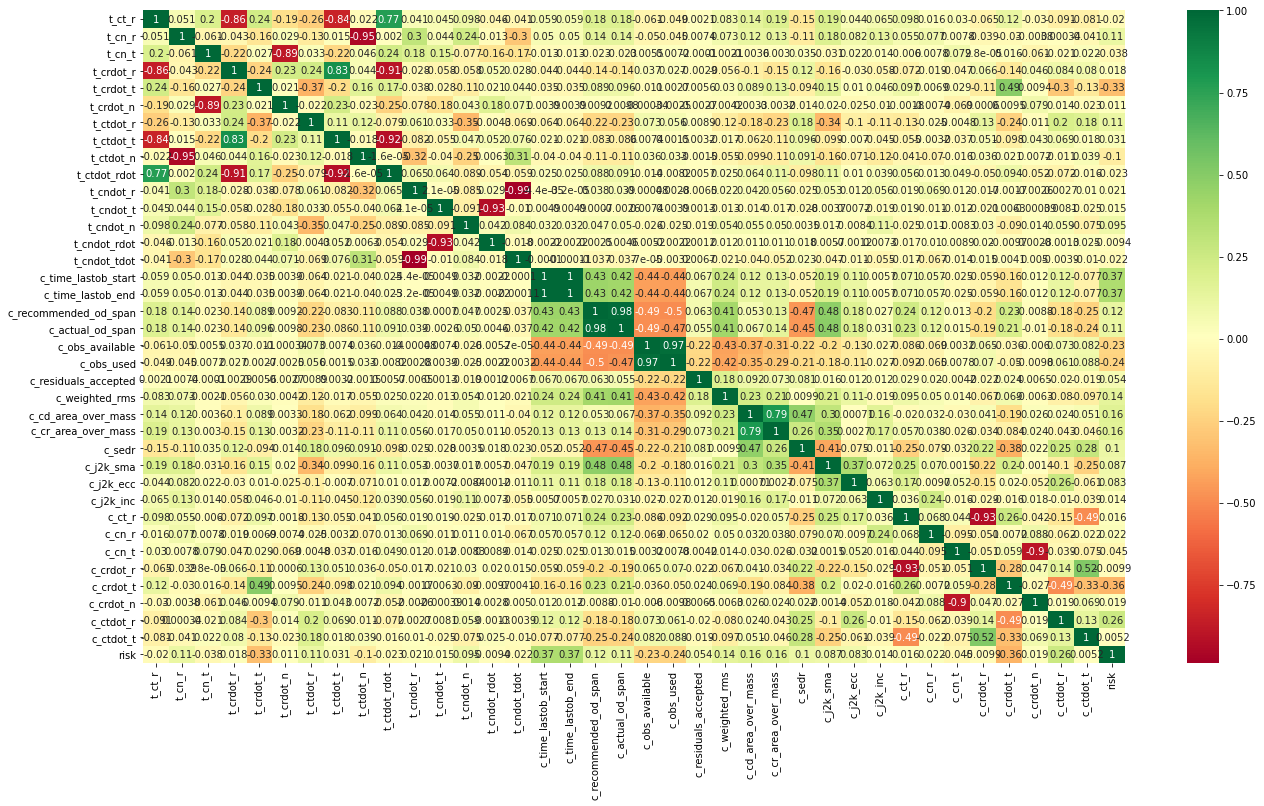

In [14]:
# to display the correlation spearman with risk
plt.figure(figsize=(22,12))
sns.heatmap(df_copy1.corr(method='spearman'), annot =True, cmap='RdYlGn')

<AxesSubplot:>

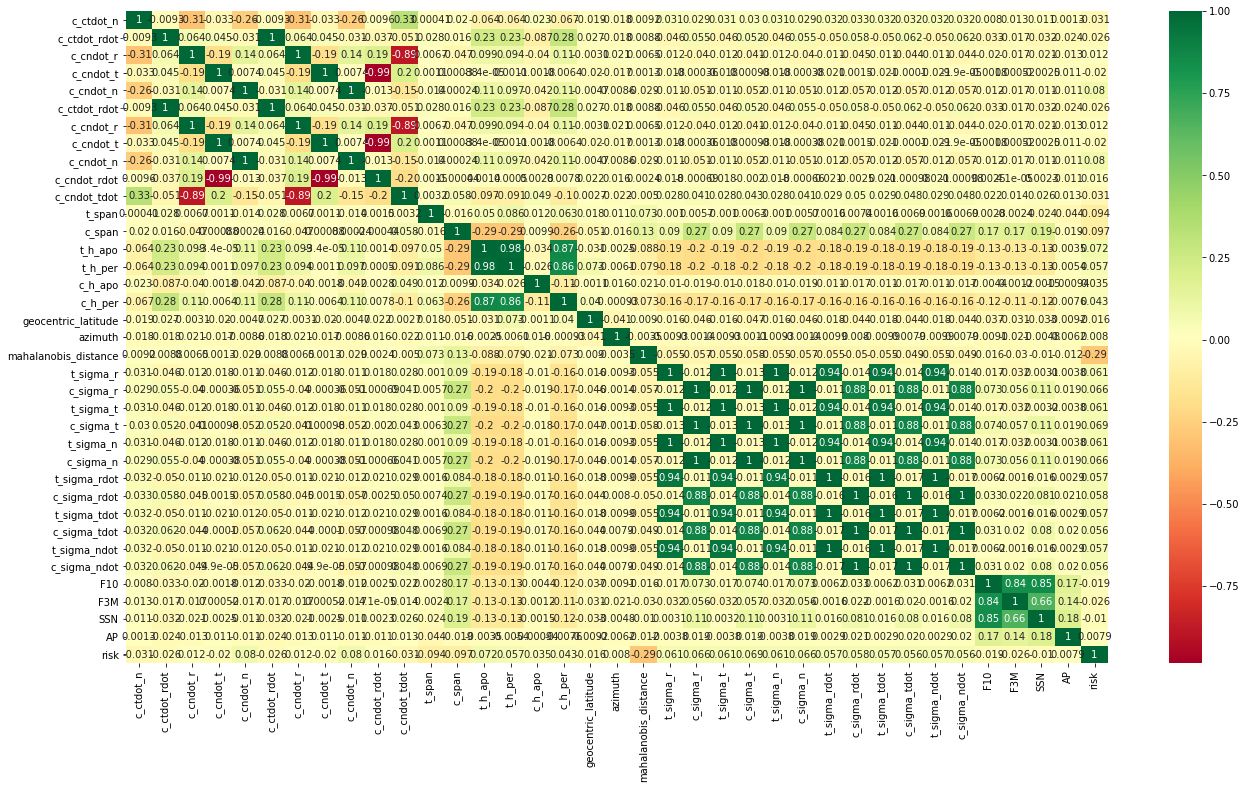

In [15]:
plt.figure(figsize=(22,12))
sns.heatmap(df_copy2.corr(), annot =True, cmap='RdYlGn')

<AxesSubplot:>

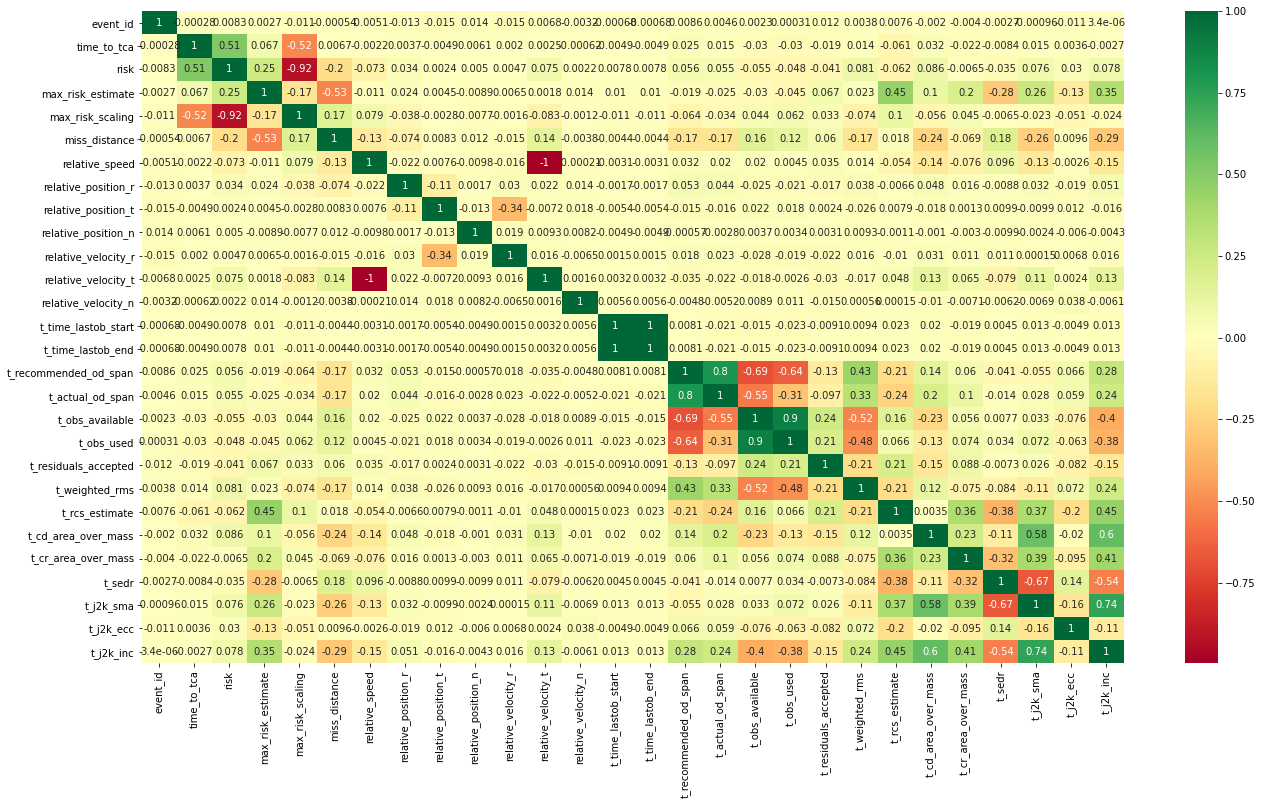

In [16]:
plt.figure(figsize=(22,12))
sns.heatmap(df_copy.corr(method='spearman'), annot =True, cmap='RdYlGn')

<AxesSubplot:>

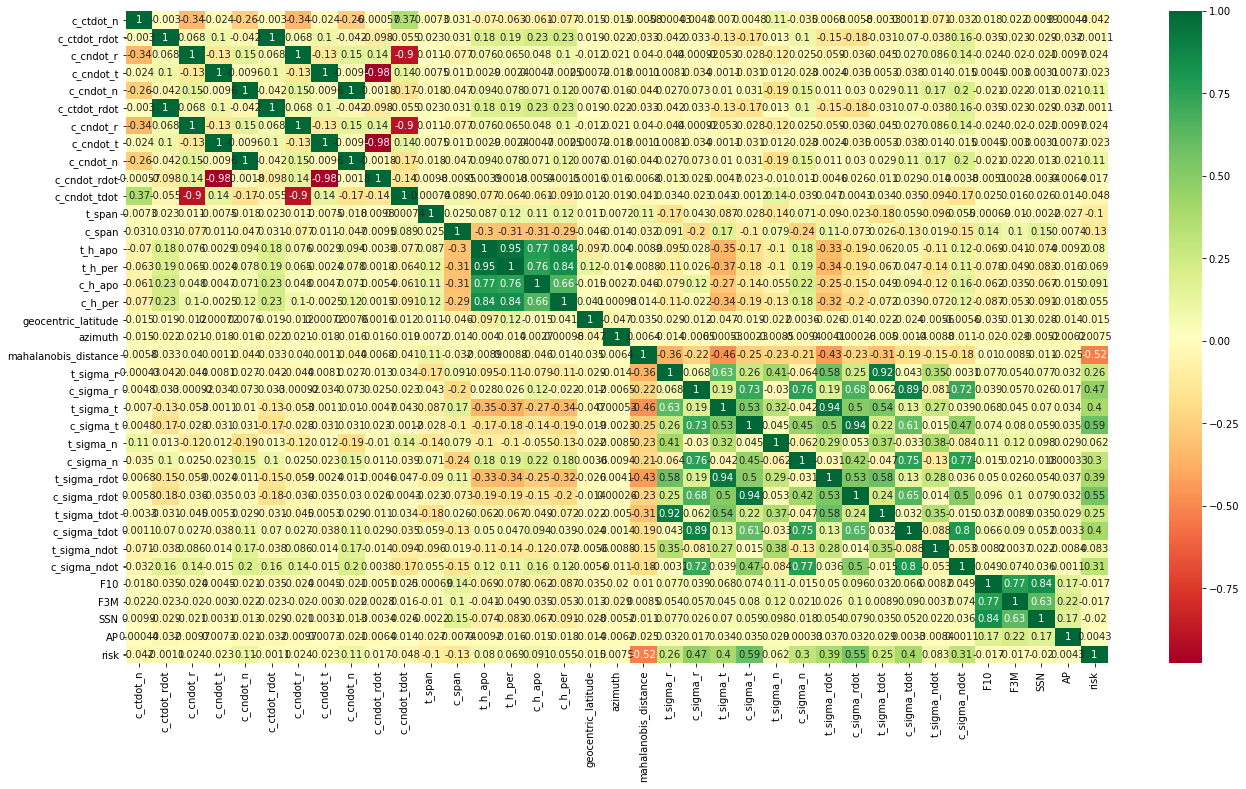

In [17]:
plt.figure(figsize=(22,12))
sns.heatmap(df_copy2.corr(method='spearman'), annot =True, cmap='RdYlGn')

In [18]:
# it chooses the features have correlation (spearman method) with risk higher than 0.1
correlations_man = train_data.corr(method='spearman')['risk'].sort_values(ascending=False)

significant_features_man = correlations[correlations_man.abs() > 0.1]
significant_features_man

risk                         1.000000
time_to_tca                  0.518096
c_time_lastob_end            0.379299
c_time_lastob_start          0.368001
max_risk_estimate            0.223786
c_ctdot_r                    0.191481
c_recommended_od_span        0.129550
c_actual_od_span             0.116252
c_cr_area_over_mass          0.105139
t_cn_r                       0.092741
c_cd_area_over_mass          0.086824
c_weighted_rms               0.086071
c_cndot_n                    0.080378
t_ctdot_r                    0.072933
c_sigma_t                    0.069317
c_sigma_r                    0.066305
c_sigma_n                    0.066269
c_position_covariance_det    0.066263
t_sigma_t                    0.061099
t_sigma_r                    0.061090
t_position_covariance_det    0.061090
c_sigma_rdot                 0.058178
t_sigma_rdot                 0.057105
t_sigma_tdot                 0.057099
c_sigma_tdot                 0.055604
c_sigma_ndot                 0.055603
c_sedr      

In [19]:
#to display the features that  have correlation with risk higher than 0.1 in list so it would be easier to copy
significant_features_list = significant_features_man.index.tolist()

# Add single quotes to each feature name
significant_features_list = [f'{feature}'for feature in significant_features_list]

print(significant_features_list)

['risk', 'time_to_tca', 'c_time_lastob_end', 'c_time_lastob_start', 'max_risk_estimate', 'c_ctdot_r', 'c_recommended_od_span', 'c_actual_od_span', 'c_cr_area_over_mass', 't_cn_r', 'c_cd_area_over_mass', 'c_weighted_rms', 'c_cndot_n', 't_ctdot_r', 'c_sigma_t', 'c_sigma_r', 'c_sigma_n', 'c_position_covariance_det', 't_sigma_t', 't_sigma_r', 't_position_covariance_det', 'c_sigma_rdot', 't_sigma_rdot', 't_sigma_tdot', 'c_sigma_tdot', 'c_sigma_ndot', 'c_sedr', 'c_crdot_t', 't_crdot_t', 'max_risk_scaling', 't_ctdot_n', 't_span', 'c_span', 'c_obs_available', 'miss_distance', 'c_obs_used', 'mahalanobis_distance']


In [20]:
# to see correlation between features
corr_matrix = train_data.corr()

# Find pairs of features with correlation higher than 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if (corr_matrix.iloc[i, j]) > 0.9:
            print(f"Features {corr_matrix.columns[i]} and {corr_matrix.columns[j]} have a correlation of {corr_matrix.iloc[i, j]}")

Features t_obs_available and t_obs_used have a correlation of 0.9831667629676867
Features t_j2k_sma and t_h_apo have a correlation of 0.994789911477008
Features t_j2k_sma and t_h_per have a correlation of 0.9950430079473135
Features t_crdot_t and t_position_covariance_det have a correlation of 0.9115743111840735
Features t_crdot_t and t_sigma_r have a correlation of 0.9115742865069577
Features t_crdot_t and t_sigma_t have a correlation of 0.91157492307989
Features t_crdot_t and t_sigma_n have a correlation of 0.9115743085721679
Features t_crdot_t and t_sigma_rdot have a correlation of 0.9653113947016575
Features t_crdot_t and t_sigma_tdot have a correlation of 0.9653143131942575
Features t_crdot_t and t_sigma_ndot have a correlation of 0.9653143377886214
Features c_time_lastob_start and c_time_lastob_end have a correlation of 0.9062161081167546
Features c_j2k_sma and c_j2k_ecc have a correlation of 0.9504682421727363
Features c_j2k_sma and c_h_apo have a correlation of 0.99904401466434

In [21]:
df = train_data[['t_sigma_r', 'c_sigma_r', 't_sigma_t',
                 'c_sigma_t', 't_sigma_n','c_sigma_n', 't_sigma_rdot', 'c_sigma_rdot', 't_sigma_tdot', 'c_sigma_tdot',
                 't_sigma_ndot', 'c_sigma_ndot','t_j2k_sma', 'c_j2k_sma', 'c_j2k_ecc', 'c_j2k_inc',
                 't_h_apo','t_h_per', 'c_crdot_t']]

<AxesSubplot:>

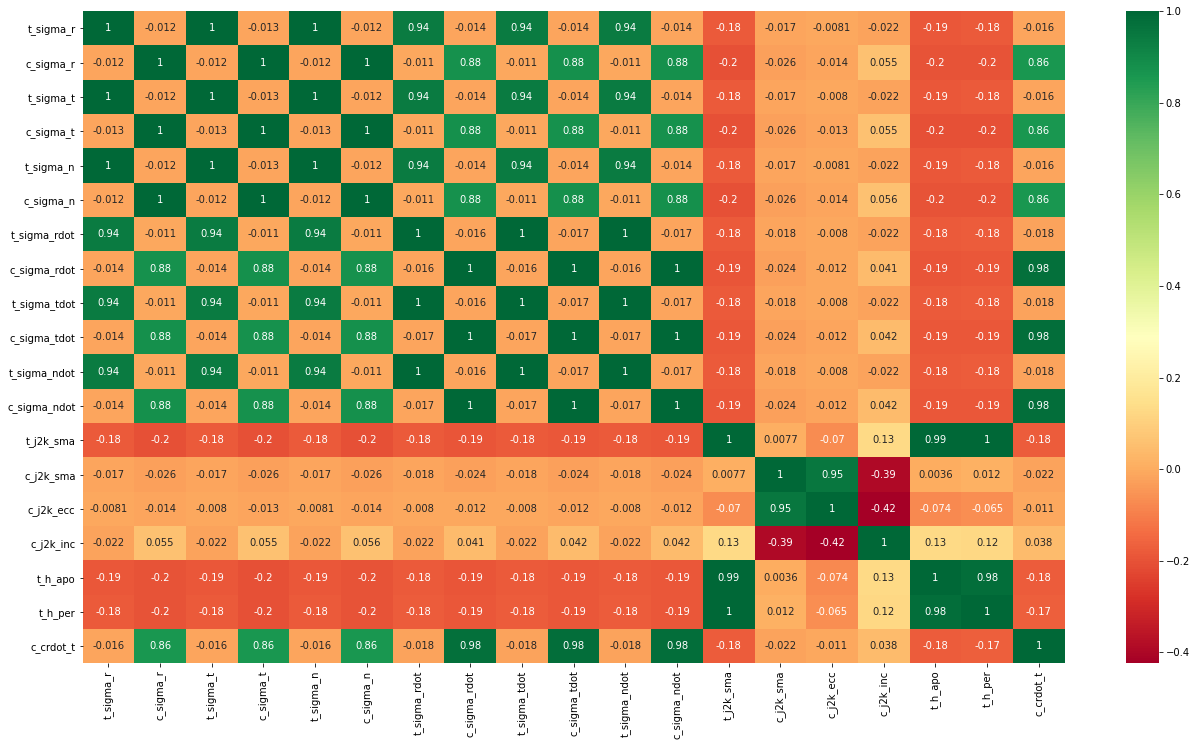

In [22]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(), annot =True, cmap='RdYlGn')

In [23]:
correlations = train_data.corr()['c_crdot_t'].sort_values(ascending=False)

significant_features = correlations[correlations > 0.8]
significant_features

c_crdot_t                    1.000000
c_sigma_ndot                 0.978785
c_sigma_tdot                 0.978784
c_sigma_rdot                 0.977229
c_sigma_n                    0.859381
c_position_covariance_det    0.859381
c_sigma_r                    0.859380
c_sigma_t                    0.858209
Name: c_crdot_t, dtype: float64

In [24]:
ccorrelations = train_data.corr()['c_sigma_t'].sort_values(ascending=False)

significant_features = correlations[correlations > 0.8]
significant_features

c_crdot_t                    1.000000
c_sigma_ndot                 0.978785
c_sigma_tdot                 0.978784
c_sigma_rdot                 0.977229
c_sigma_n                    0.859381
c_position_covariance_det    0.859381
c_sigma_r                    0.859380
c_sigma_t                    0.858209
Name: c_crdot_t, dtype: float64

In [25]:
correlations = train_data.corr()['c_sigma_n'].sort_values(ascending=False)

significant_features = correlations[correlations > 0.8]
significant_features

c_sigma_n                    1.000000
c_position_covariance_det    1.000000
c_sigma_r                    1.000000
c_sigma_t                    0.998742
c_sigma_ndot                 0.877821
c_sigma_tdot                 0.877821
c_sigma_rdot                 0.876610
c_crdot_t                    0.859381
Name: c_sigma_n, dtype: float64

In [26]:
correlations = train_data.corr()['c_sigma_r'].sort_values(ascending=False)

significant_features = correlations[correlations > 0.8]
significant_features

c_sigma_r                    1.000000
c_sigma_n                    1.000000
c_position_covariance_det    1.000000
c_sigma_t                    0.998760
c_sigma_tdot                 0.877821
c_sigma_ndot                 0.877821
c_sigma_rdot                 0.876625
c_crdot_t                    0.859380
Name: c_sigma_r, dtype: float64

In [27]:
correlations = train_data.corr()['c_position_covariance_det'].sort_values(ascending=False)

significant_features = correlations[correlations > 0.8]
significant_features

c_position_covariance_det    1.000000
c_sigma_n                    1.000000
c_sigma_r                    1.000000
c_sigma_t                    0.998741
c_sigma_ndot                 0.877821
c_sigma_tdot                 0.877821
c_sigma_rdot                 0.876609
c_crdot_t                    0.859381
Name: c_position_covariance_det, dtype: float64